In [1]:
# Enable code formatting using external plugin: nb_black.
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Distributions - Part 2

1. [Central Limit Theorem](#Central-Limit-Theorem)
2. [QQ-Plot](#Q-Q-PLot)

#### Load and configure required libraries

In [2]:
# Data manipulation libraries.
import numpy as np
import scipy as sp

# Data visualization libraries.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("NumPy version:", np.__version__)
print("SciPy version:", sp.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

np.set_printoptions(linewidth=130)  # Line width: Maximum 130 characters in the output, post which it will continue in next line.

# sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

NumPy version: 1.21.5
SciPy version: 1.7.3
Matplotlib version: 3.5.2
Seaborn version: 0.11.2


<IPython.core.display.Javascript object>

## Central Limit Theorem

Generate random variable `r` with **Right skewed Normal Distribution**.

In [3]:
from scipy.stats import skewnorm

a = 10  # Skewness parameter
pop = 30000  # Population size
mean, var, skew, kurt = skewnorm.stats(a, moments="mvsk")

x = np.linspace(skewnorm.ppf(0.001, a), skewnorm.ppf(0.999, a), pop)
y = skewnorm.pdf(x, a)

# Create random distribution
r = skewnorm.rvs(a, size=pop)

print("Population size:", len(r))
print("Population Mean:", np.round(mean, 3))
print("Population Variance:", np.round(var, 3))
print("Population Skew:", np.round(skew, 3))
print("Population Kurtosis:", np.round(kurt, 3))

Population size: 30000
Population Mean: 0.794
Population Variance: 0.37
Population Skew: 0.956
Population Kurtosis: 0.823


<IPython.core.display.Javascript object>

Plot skewed distribution `r`

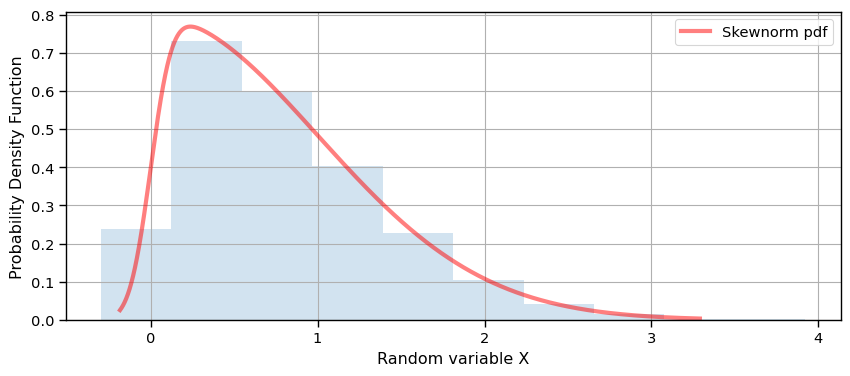

<IPython.core.display.Javascript object>

In [7]:
plt.figure(figsize=(10, 4))

plt.plot(x, y, "r-", lw=3, alpha=0.5, label="Skewnorm pdf")
plt.hist(r, density=True, histtype="stepfilled", alpha=0.2)
plt.xlabel("Random variable X")
plt.ylabel("Probability Density Function")
plt.grid(True)
plt.legend()

plt.show()

Generate **Sampling Distribution of Sample-Means (SDSM)**.

In [8]:
smp_size = 30  # Size of each sample.
smp_count = 1000  # Total number of samples.

print("Population Mean:", np.round(np.mean(r), 3))
print("Population Variance:", np.round(np.var(r), 3))
print("Expected Mean of SD of SM:", np.round(np.mean(r), 3))  # Expected sdsm mean
print("Expected Variance of SD of SM:", np.round(np.var(r) / smp_size, 4))  # Expected sdsm variance

Population Mean: 0.798
Population Variance: 0.371
Expected Mean of SD of SM: 0.798
Expected Variance of SD of SM: 0.0124


<IPython.core.display.Javascript object>

Generate **1000 samples** of **size 30** from population a `r` of **size 30,000**.

In [9]:
# sdsm: Sampling Distribution of Sample-Means.
sdsm = [np.mean(np.random.choice(r, replace=False, size=smp_size)) for _ in range(0, smp_count)]

print("Actual Mean of SD of SM:", np.round(np.mean(sdsm), 3))
print("Actual Variance of SD of SM:", np.round(np.var(sdsm), 4))

Actual Mean of SD of SM: 0.805
Actual Variance of SD of SM: 0.0128


<IPython.core.display.Javascript object>

Plot **Gaussian Distribution** of **Sampling Distribution of Sample-Means**

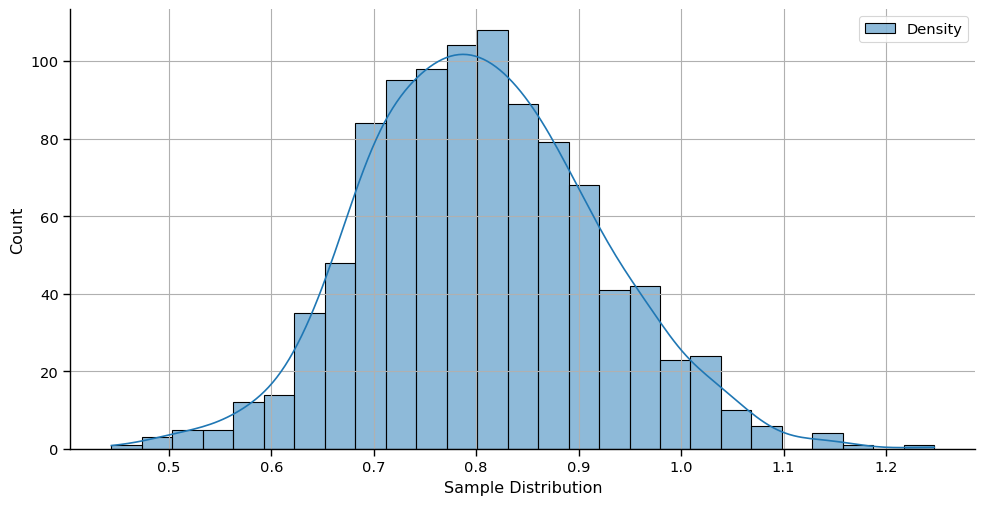

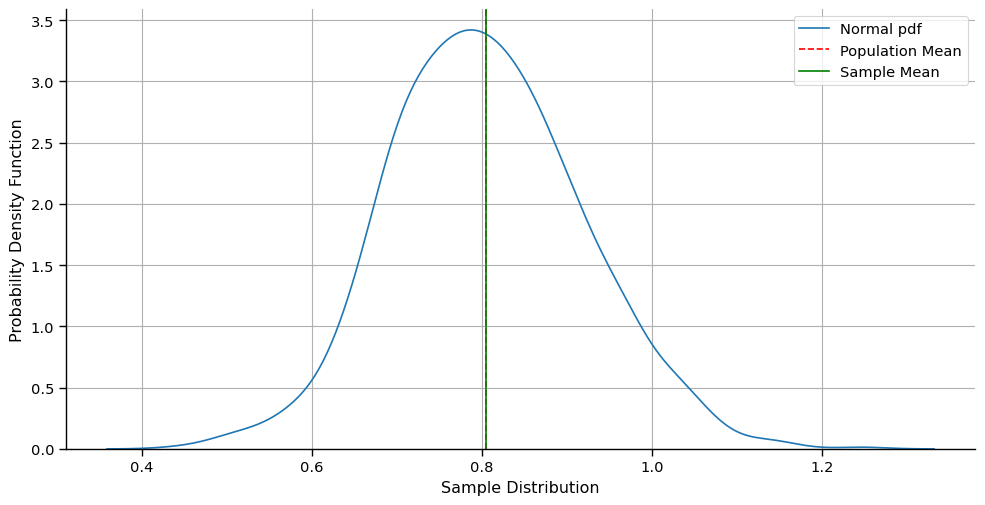

<IPython.core.display.Javascript object>

In [23]:
sns.displot(sdsm, kde=True, aspect=2, label="Density")
plt.xlabel("Sample Distribution")
plt.ylabel("Count")
plt.grid(True)
plt.legend()

dp = sns.displot(sdsm, kind="kde", aspect=2, label="Normal pdf")
plt.axvline(mean, linestyle="--", color="r", label="Population Mean")
plt.axvline(np.mean(sdsm), linestyle="-", color="g", label="Sample Mean")
plt.xlabel("Sample Distribution")
plt.ylabel("Probability Density Function")
plt.grid(True)
plt.legend()

plt.show()

#### Plot Standard deviation for the distribution

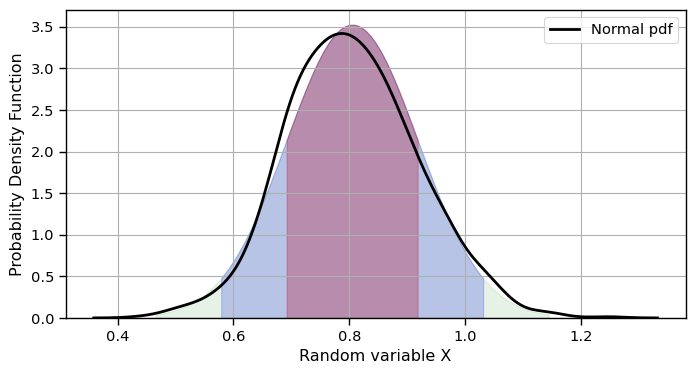

<IPython.core.display.Javascript object>

In [21]:
from scipy.stats import norm

mean = np.mean(sdsm)
std = np.std(sdsm)

plt.figure(figsize=(8, 4))

ax = sns.kdeplot(sdsm, linewidth=2, color="black", label="Normal pdf")
plt.xlabel("Random variable X")
plt.ylabel("Probability Density Function")
plt.grid(True)
plt.legend()

# Plot 1-std.
x = np.linspace(mean - std, mean + std)
y = norm.pdf(x, mean, std)
ax.fill_between(x, y, alpha=0.3, color="red")

# Plot 2-std.
x = np.linspace(mean - (2 * std), mean + (2 * std))
y = norm.pdf(x, mean, std)
ax.fill_between(x, y, alpha=0.2, color="blue")

# Plot 3-std.
x = np.linspace(mean - (3 * std), mean + (3 * std))
y = norm.pdf(x, mean, std)
ax.fill_between(x, y, alpha=0.1, color="green")

plt.show()

## Q-Q PLot

Q-Q Plot is one of the simple graphical method to determine if a random variable is a Gaussian distribution.

Check if `sdsm` is Gaussian distribution?

#### x-Coordinates: Standard Normal Variate (Z)

```
X ~ N(0, 1)
  μ = 1
  σ² = 1
```

In [16]:
X = np.sort(np.random.normal(loc=0, scale=1, size=1000))
qqp_x = np.array([np.percentile(X, i) for i in range(1, 101)])

# Print Quartiles.
np.round(qqp_x[0::25], 3)

array([-2.211, -0.61 ,  0.013,  0.709])

<IPython.core.display.Javascript object>

#### y-Coordinates

In [17]:
Y = np.sort(sdsm)
qqp_y = np.array([np.percentile(Y, i) for i in range(1, 101)])

# Print Quartiles.
np.round(qqp_y[0::25], 3)

array([0.54 , 0.73 , 0.802, 0.881])

<IPython.core.display.Javascript object>

#### Plot 1: `X` vs `Y` using `plt.plot`

1. `X`: Standard Normal Variate, where X ~ N(0, 1).
2. `Y`: Sampling Distribution of Sample-Means

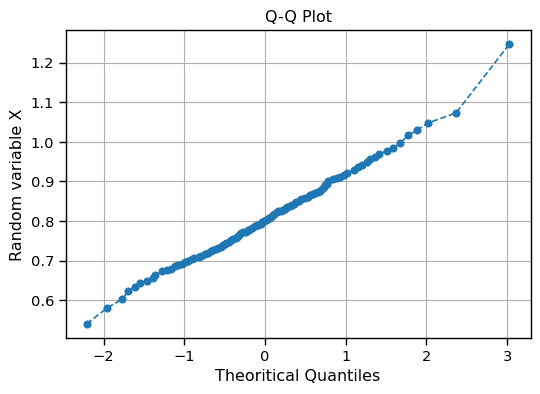

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(6, 4))

plt.plot(qqp_x, qqp_y, marker="o", linestyle="--")
plt.xlabel("Theoritical Quantiles")
plt.ylabel("Random variable X")
plt.title("Q-Q Plot")
plt.grid(True)

plt.show()

#### Plot 2: `X` vs `Y` using `probplot`

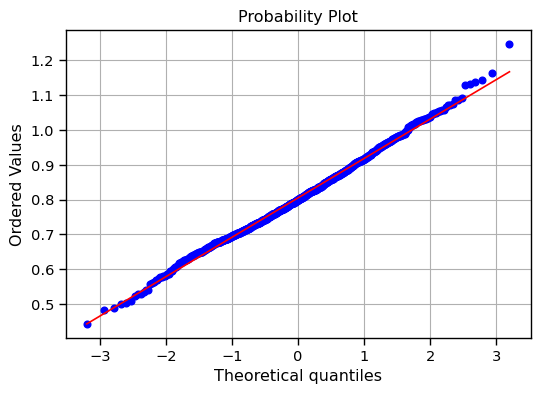

<IPython.core.display.Javascript object>

In [19]:
from scipy.stats import probplot

plt.figure(figsize=(6, 4))
probplot(Y, dist="norm", plot=plt)
plt.grid(True)

plt.show()

#### Conclusion

1. Since most of the points lie approximately on the straight line (red line), **`X` and `Y` have similar distribution**.
2. `X` is normally distributed, hence `Y` is also **Normally distributed** i.e., `Y ~ N(μ, σ²)`

#### Plot 3: `X` vs `r` using `probplot`

1. `X`: Standard Normal Variate, where X ~ N(0, 1).
2. `r`: Skewed Normal distribution.

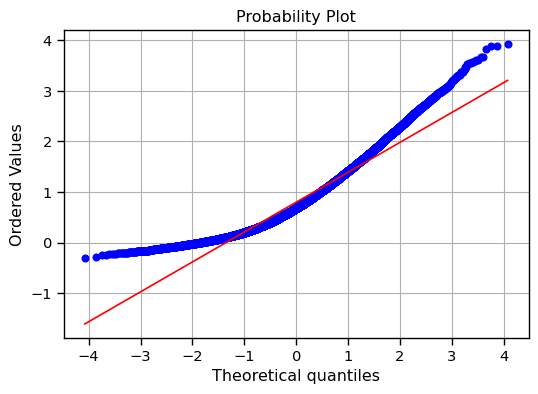

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(6, 4))

probplot(r, dist="norm", plot=plt)
plt.grid(True)

plt.show()